In [7]:
import pandas as pd
from collections import Counter

file_path = r"C:\Users\arora\OneDrive\Documents\Creditcard_data (1).csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.columns)

target_column = 'Class'  
print("Class Distribution Before Balancing:", Counter(df[target_column]))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
df = df.dropna()

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable


In [ ]:
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After SMOTE:", Counter(y_resampled))

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target_column] = y_resampled
df_resampled.to_csv("balanced_dataset_smote.csv", index=False)


In [14]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

print("Class Distribution After Undersampling:", Counter(y_under))

df_undersampled = pd.DataFrame(X_under, columns=X.columns)
df_undersampled[target_column] = y_under
df_undersampled.to_csv("balanced_dataset_undersampling.csv", index=False)


Class Distribution After Undersampling: Counter({0: 9, 1: 9})


In [15]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_combined, y_combined = smote_enn.fit_resample(X, y)

print("Class Distribution After SMOTE + ENN:", Counter(y_combined))

df_combined = pd.DataFrame(X_combined, columns=X.columns)
df_combined[target_column] = y_combined
df_combined.to_csv("balanced_dataset_smoteenn.csv", index=False)


Class Distribution After SMOTE + ENN: Counter({1: 644, 0: 509})


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       220
           1       0.88      1.00      0.94       238

    accuracy                           0.93       458
   macro avg       0.94      0.93      0.93       458
weighted avg       0.94      0.93      0.93       458



c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import numpy as np
from sklearn.metrics import roc_curve, classification_report

y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

optimal_threshold = thresholds[np.argmax(tpr - fpr)]
y_pred_new = (y_probs >= optimal_threshold).astype(int)

print("Classification Report after Threshold Adjustment:\n", classification_report(y_test, y_pred_new))


Classification Report after Threshold Adjustment:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       220
           1       0.88      1.00      0.94       238

    accuracy                           0.93       458
   macro avg       0.94      0.93      0.93       458
weighted avg       0.94      0.93      0.93       458



In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


Confusion Matrix:
 [[187  33]
 [  0 238]]
Precision Score: 0.8782287822878229
Recall Score: 1.0
F1 Score: 0.9351669941060904
ROC AUC Score: 0.9507257448433919


C:\Users\shrey\AppData\Local\Temp\ipykernel_2620\519401818.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


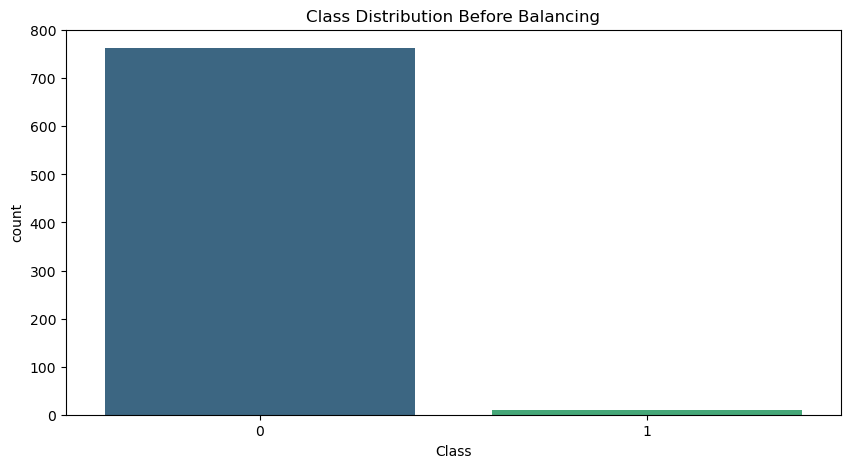

C:\Users\shrey\AppData\Local\Temp\ipykernel_2620\519401818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="viridis")


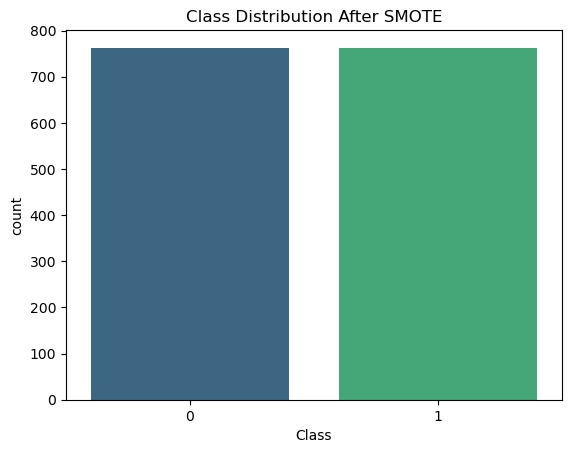

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Before resampling
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution Before Balancing")
plt.show()

# After resampling
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.show()
